In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
# importing the required libraries

#### Reading the csv file with low_memory = False so there will be no dtype warnings

In [2]:
df = pd.read_csv('loan.csv',low_memory = False)
# reading the csv

#### Getting the info of all columns

In [3]:
df.info(verbose=True)
# getting the info of the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

#### Printing the shape of data frame

In [4]:
df.shape

(39717, 111)

#### In EDA first step is cleaning rows and columns , In the given data there are entire columns with N/A values so in this next step we will remove all the columns which consists N/A values.

In [5]:
df = df.dropna(how='all',axis=1)
# here we used dropna() function in pandas 
# how = 'all' means if the entire row is N/A then the column will be dropped
# axis = 1 represents columns

#### Printing shape of the df after removing the N/A columns, Here we can see significant drop in the columns from 111 to 57

In [6]:
df.shape

(39717, 57)

#### Few Columns only consists of 0 and Blanks they don't have any priority in analysis so dropping the values from df

In [7]:
df = df.drop(['tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','collections_12_mths_ex_med','url','desc','zip_code','emp_title','mths_since_last_delinq','mths_since_last_record','title'],axis=1)

#### Printing shape of the df after removing columns that consists of 0 and Blanks , Here the columns drop from 57 to 52

In [8]:
df.shape

(39717, 45)

#### Now we will be dropping columns that are having common default values through the entire data set such as

##### pymnt_plan = n
##### initial_list_status = f
##### policy_code = 1 (publicy available policy code)
##### application_type = Individual (there are no joint accounts)

In [9]:
df['pymnt_plan'].value_counts()

n    39717
Name: pymnt_plan, dtype: int64

In [10]:
df['initial_list_status'].value_counts()

f    39717
Name: initial_list_status, dtype: int64

In [11]:
df['policy_code'].value_counts()

1    39717
Name: policy_code, dtype: int64

In [12]:
df['application_type'].value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [13]:
df.shape

(39717, 45)

In [14]:
# dropping the respective columns because they are default in nature 
df = df.drop(['pymnt_plan','initial_list_status','policy_code','application_type'],axis=1)

In [15]:
df.shape

(39717, 41)

#### Renaming Columns so that it will be easy to understand

In [16]:
df.rename(columns = {'id':'loan_id','funded_amnt_inv':'funded_amnt_by_investors','int_rate':'interest_rate','emp_lenght':'emp_job_length','annual_inc':'annual_income','issue_d':'loan_issued_date','purpose':'loan_purpose','title':'loan_title','addr_state':'adress_state','open_acc':'open_account','pub_rec':'public_records','last_pymnt_d':'last_pymnt_date','next_pymnt_d':'next_pymnt_date','out_prncp_inv':'outstanding_principal_investors','out_prncp':'outstanding_principal','total_pymnt_inv':'total_pymnt_investors','last_credit_pull_d':'last_credit_pull_date','pub_rec_bankruptcies':'public_recorded_bankruptcies','revol_bal':'revolving_balance','revol_util':'revolving_line_utilization_rate','dti':'debt_to_income_ratio'},inplace = True)

In [17]:
df.info(verbose = True)
# checking the renamed columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   loan_id                          39717 non-null  int64  
 1   member_id                        39717 non-null  int64  
 2   loan_amnt                        39717 non-null  int64  
 3   funded_amnt                      39717 non-null  int64  
 4   funded_amnt_by_investors         39717 non-null  float64
 5   term                             39717 non-null  object 
 6   interest_rate                    39717 non-null  object 
 7   installment                      39717 non-null  float64
 8   grade                            39717 non-null  object 
 9   sub_grade                        39717 non-null  object 
 10  emp_length                       38642 non-null  object 
 11  home_ownership                   39717 non-null  object 
 12  annual_income     

#### Now we will fix the missing values only in required columns some columns don't require this 

In [18]:
df.isna().sum()

loan_id                                0
member_id                              0
loan_amnt                              0
funded_amnt                            0
funded_amnt_by_investors               0
term                                   0
interest_rate                          0
installment                            0
grade                                  0
sub_grade                              0
emp_length                          1075
home_ownership                         0
annual_income                          0
verification_status                    0
loan_issued_date                       0
loan_status                            0
loan_purpose                           0
adress_state                           0
debt_to_income_ratio                   0
delinq_2yrs                            0
earliest_cr_line                       0
inq_last_6mths                         0
open_account                           0
public_records                         0
revolving_balanc

#### In emp_length we will fill blanks with zero 

In [19]:
df['emp_length'] = df['emp_length'].fillna(0)
# filling na spaces with zero

In [20]:
df['revolving_line_utilization_rate'] = df['revolving_line_utilization_rate'].fillna(0)
# filling na spaces with zero

In [21]:
df['public_recorded_bankruptcies'].fillna('Not known',inplace=True)
# filling na spaces with Notknown

In [22]:
df.isna().sum()
# checking for null columns

loan_id                                0
member_id                              0
loan_amnt                              0
funded_amnt                            0
funded_amnt_by_investors               0
term                                   0
interest_rate                          0
installment                            0
grade                                  0
sub_grade                              0
emp_length                             0
home_ownership                         0
annual_income                          0
verification_status                    0
loan_issued_date                       0
loan_status                            0
loan_purpose                           0
adress_state                           0
debt_to_income_ratio                   0
delinq_2yrs                            0
earliest_cr_line                       0
inq_last_6mths                         0
open_account                           0
public_records                         0
revolving_balanc

#### Converting dtype according to columns

In [23]:
df['interest_rate']=df['interest_rate'].apply(lambda x: float(x.replace('%','')))
# converting object to float

In [24]:
df['revolving_line_utilization_rate']=df['revolving_line_utilization_rate'].apply(lambda x: str(x))
# converting object to str bz there are multiple data types in

In [25]:
df['revolving_line_utilization_rate']=df['revolving_line_utilization_rate'].apply(lambda x: float(x.replace('%','')))
# converting str to float

In [26]:
df['loan_issued_date'] = pd.to_datetime(df['loan_issued_date'],format='%b-%y')
df['loan_year']=pd.to_datetime(df['loan_issued_date']).dt.year
df['loan_month']=pd.to_datetime(df['loan_issued_date']).dt.month

# converting object to datetime
# and we are creating a Business driven metrics here

In [27]:
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'],format='%b-%y')
# converting object to date 

In [28]:
df['last_pymnt_date'] = pd.to_datetime(df['last_pymnt_date'],format='%b-%y')
# converting object to date

In [29]:
df['next_pymnt_date'] = pd.to_datetime(df['next_pymnt_date'],format='%b-%y')
# converting object to date

In [30]:
df['last_credit_pull_date'] = pd.to_datetime(df['last_credit_pull_date'],format='%b-%y')
# converting object to date

In [31]:
df['emp_length']=df['emp_length'].apply(lambda x: str(x))
df['emp_length']=df['emp_length'].apply(lambda x: x.replace('<',''))
df['emp_length']=df['emp_length'].apply(lambda x: x.replace('+',''))
df['emp_length']=df['emp_length'].apply(lambda x: x.replace('years',''))
df['emp_length']=df['emp_length'].apply(lambda x: int(x.replace('year','')))

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 43 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   loan_id                          39717 non-null  int64         
 1   member_id                        39717 non-null  int64         
 2   loan_amnt                        39717 non-null  int64         
 3   funded_amnt                      39717 non-null  int64         
 4   funded_amnt_by_investors         39717 non-null  float64       
 5   term                             39717 non-null  object        
 6   interest_rate                    39717 non-null  float64       
 7   installment                      39717 non-null  float64       
 8   grade                            39717 non-null  object        
 9   sub_grade                        39717 non-null  object        
 10  emp_length                       39717 non-null  int64    

### UNIVARIATE ANALYSIS

In [33]:
# analysing loan amount using describe function
df['loan_amnt'].describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

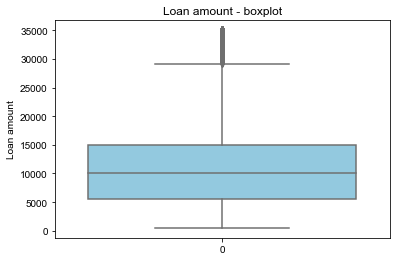

In [34]:
sns.boxplot(data = df['loan_amnt'],color='skyblue')
sns.set_style('darkgrid')
plt.title('Loan amount - boxplot')
plt.ylabel('Loan amount')
plt.show()
#observation
# as we can see there are no outliers in this column
# most amount of loan applications lie in 5000-15000 range

In [35]:
# analysing funded amount using describe function
df['funded_amnt'].describe()

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

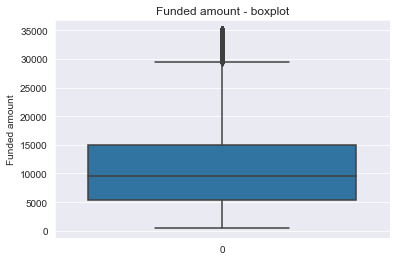

In [36]:
sns.boxplot(data = df['funded_amnt'])
plt.title('Funded amount - boxplot')
plt.ylabel('Funded amount')
plt.show()
#observation
# as we can see there are no outliers in this column
# most amount of funded applications lies around 5000-15000 range

In [37]:
# analysing funded amount by investors using describe function
df['funded_amnt_by_investors'].describe()

count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_by_investors, dtype: float64

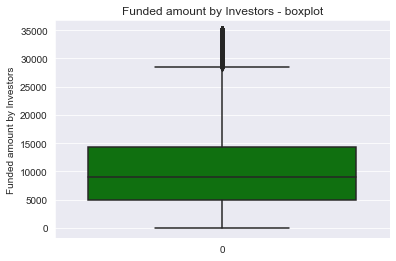

In [38]:
sns.boxplot(data = df['funded_amnt_by_investors'],color='green')
plt.title('Funded amount by Investors - boxplot')
plt.ylabel('Funded amount by Investors')
plt.show()
#observation
# as we can see there are no outliers in this column
# most amount of inestment funded applications lies around 5000-15000 range

In [39]:
# analysing interest rates using describe function
df['interest_rate'].describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: interest_rate, dtype: float64

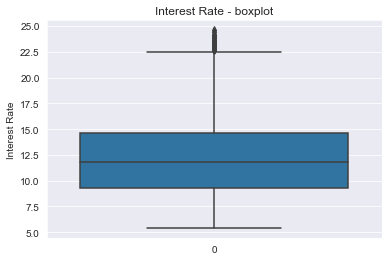

In [40]:
sns.boxplot(data = df['interest_rate'])
plt.title('Interest Rate - boxplot')
plt.ylabel('Interest Rate')
plt.show()
#observation
# as we can see there are no outliers in this column
# most amount of interest rates to the applications lies between 10% - 15%

In [41]:
# analysing employee job experience rates using describe function
df['emp_length'].describe()

count    39717.000000
mean         4.954226
std          3.461960
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

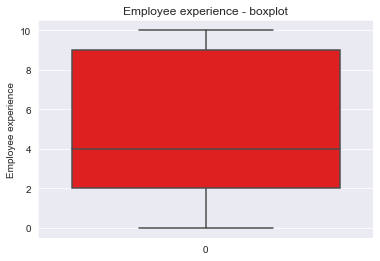

In [42]:
sns.boxplot(data = df['emp_length'],color='red')
plt.title('Employee experience - boxplot')
plt.ylabel('Employee experience')
plt.show()
#observation
# as we can see there are no outliers in this column
# most of the employees experience lies between 2 to 9 years

In [43]:
# analysing annual income experience rates using describe function
df['annual_income'].describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_income, dtype: float64

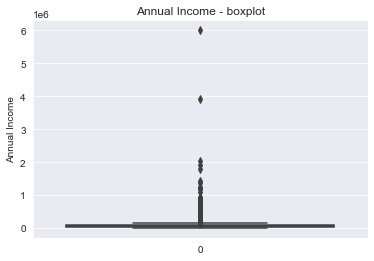

In [44]:
sns.boxplot(data = df['annual_income'])
plt.title('Annual Income - boxplot')
plt.ylabel('Annual Income')
plt.show()
# as we can see there are outliers in this column

In [45]:
# now we will remove all the outliers by taking quantile(0.99)
df=df[df['annual_income']<df['annual_income'].quantile(0.99)]

In [46]:
df.shape
# as you can see some columns are dropped

(39319, 43)

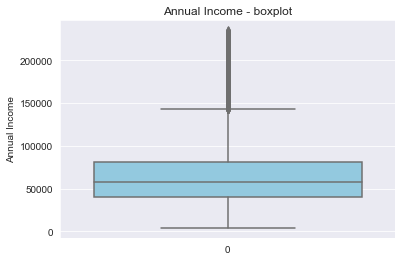

In [47]:
sns.boxplot(data = df['annual_income'],color='skyblue')
plt.title('Annual Income - boxplot')
plt.ylabel('Annual Income')
plt.show()
# observation
# as we can see there are no outliers in this column
# most of the loan applicants annual income lies around 30000 to 80000

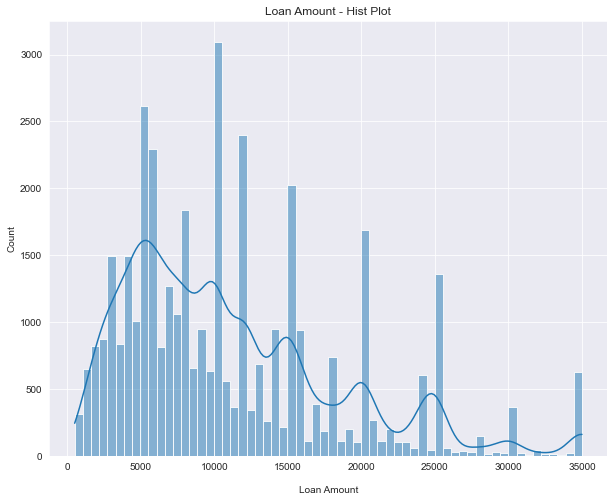

In [48]:
plt.figure(figsize=(10,8))
k = sns.histplot(df['loan_amnt'],kde=True)
k.set_title('Loan Amount - Hist Plot')
plt.xlabel('Loan Amount', labelpad=14)
plt.show()
# Observation
# there are no outliers

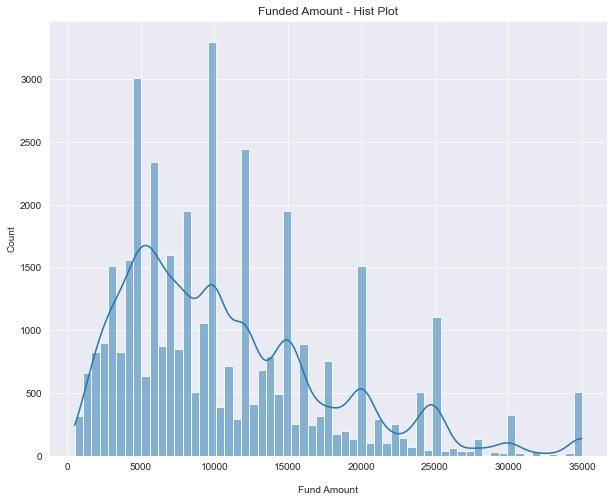

In [49]:
plt.figure(figsize=(10,8))
k = sns.histplot(df['funded_amnt'],kde=True)
k.set_title('Funded Amount - Hist Plot')
plt.xlabel('Fund Amount', labelpad=14)
plt.show()
# Observation
# there are no outliers
# and also Loan amount and funded data also looks very similar

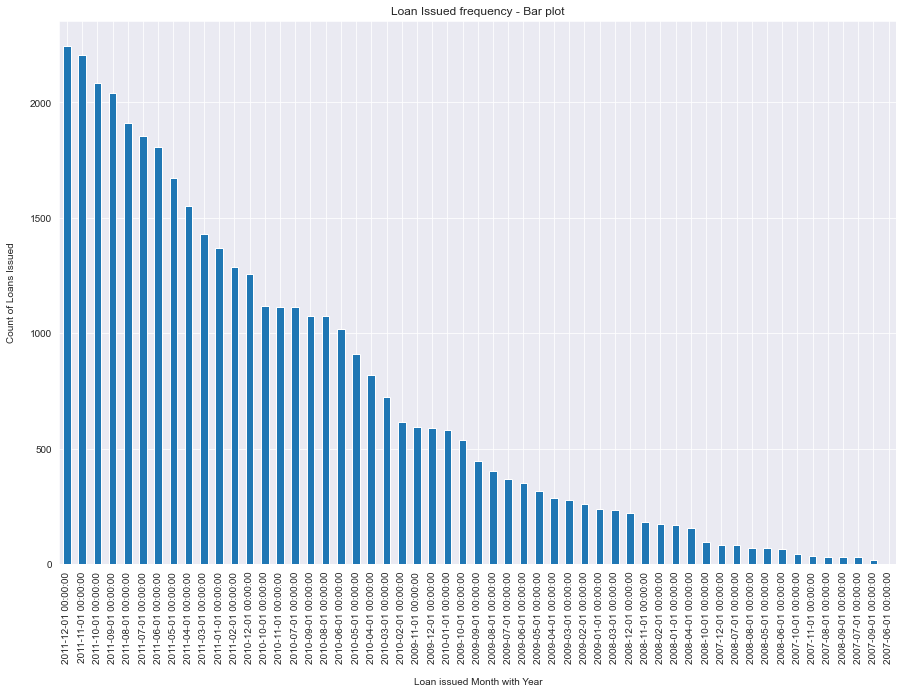

In [50]:
plt.figure(figsize=(15,10))
df['loan_issued_date'].value_counts().plot(kind='bar')
plt.title('Loan Issued frequency - Bar plot')
plt.xlabel("Loan issued Month with Year", labelpad=14)
plt.ylabel("Count of Loans Issued", labelpad=14)
plt.show()
# observation
# here we can observe that the issuance of loans increased gradually as the years progress

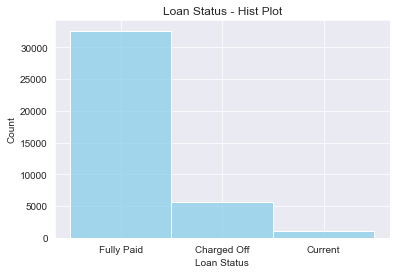

In [51]:
sns.histplot(df['loan_status'],color='skyblue')
plt.title('Loan Status - Hist Plot')
plt.xlabel('Loan Status')
plt.show()
#observation
# when compared between each other fully paid applicants are more when compared to charge off and current applicants

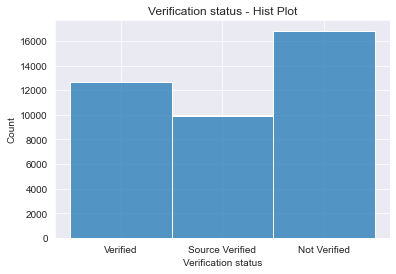

In [52]:
sns.histplot(df['verification_status'])
plt.title('Verification status - Hist Plot')
plt.xlabel('Verification status')
plt.show()
#observation
# when we see here there are more number of Not Verified users which is not good considering the amount of charged off users

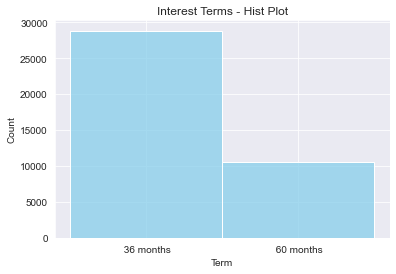

In [53]:
sns.histplot(df['term'],color='skyblue')
plt.title('Interest Terms - Hist Plot')
plt.xlabel('Term')
plt.show()
#observation
# most no of applicants applied for 36 months option when compared to 60 months

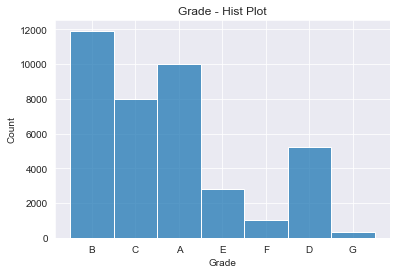

In [54]:
sns.histplot(df['grade'])
plt.title('Grade - Hist Plot')
plt.xlabel('Grade')
plt.show()
#observation
# there is a big difference between B,C,A and rest of the grades

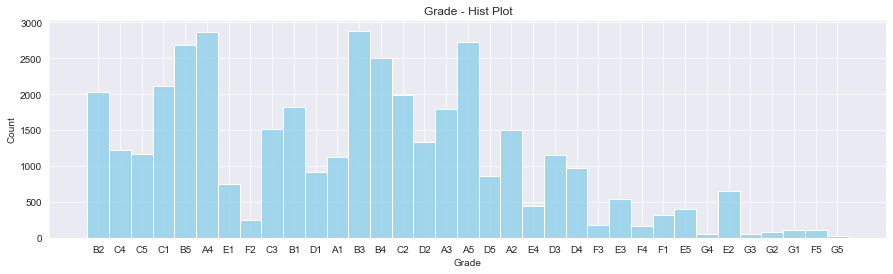

In [55]:
plt.figure(figsize=(15,4))
sns.histplot(df['sub_grade'],color='skyblue')
plt.title('Grade - Hist Plot')
plt.xlabel('Grade')
plt.show()
#observation
#it is a sub set replica of above grades

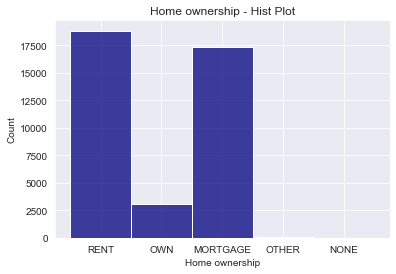

In [56]:
sns.histplot(df['home_ownership'],color='navy')
plt.title('Home ownership - Hist Plot')
plt.xlabel('Home ownership')
plt.show()
#observation
# Most of th loan applicants are staying in rent or having a mortgage

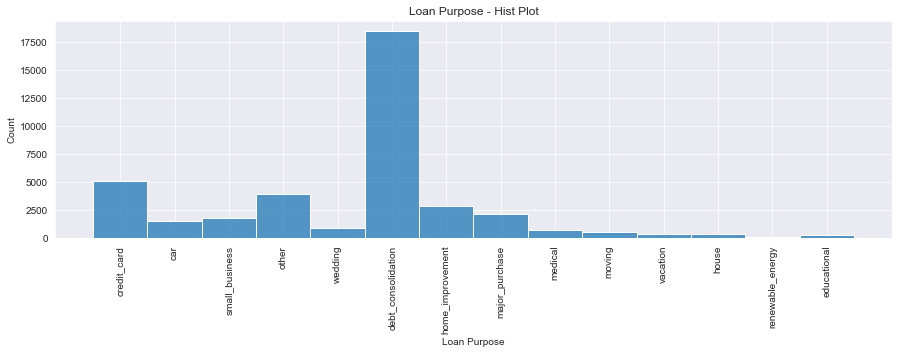

In [57]:
plt.figure(figsize=(15,4))
sns.histplot(df['loan_purpose'])
plt.title('Loan Purpose - Hist Plot')
plt.xlabel('Loan Purpose')
plt.xticks(rotation = 90)
plt.show()
#observation
# Most of th loan applicants Loan purpose is debt_consolidation
# they are taing more loans to pay off the existing debt so I think most of the charged applicants will be here

### SEGMENTED UNIVARIATE ANALYSIS

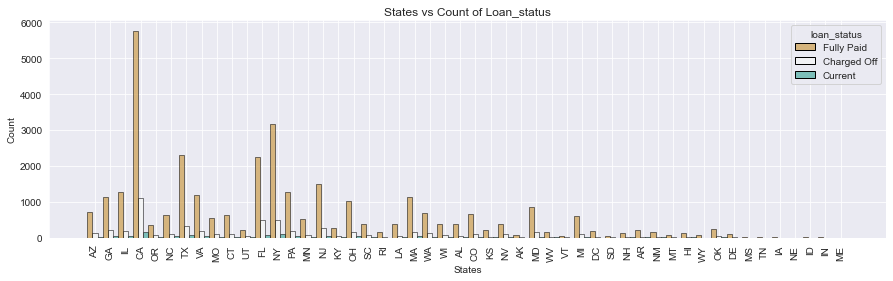

In [58]:
plt.figure(figsize=(15,4))
sns.histplot(x=df['adress_state'],hue=df['loan_status'],palette='BrBG',edgecolor='black',multiple='dodge')
plt.title('States vs Count of Loan_status')
plt.xlabel('States')
plt.xticks(rotation = 90)
plt.show()
#observation
# people in california,texas,florida,newyork and few other states comprises of most of the loans

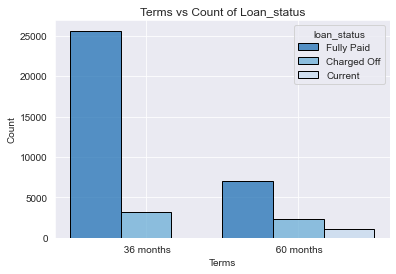

In [59]:
sns.histplot(x = df['term'],hue=df['loan_status'],palette='Blues_r',edgecolor='black',multiple='dodge')
plt.title('Terms vs Count of Loan_status')
plt.xlabel('Terms')
plt.show()
#observation
#there are no current loans in 36 months term applicants but there are more charged off applicants in 60 months when compared to 36 months

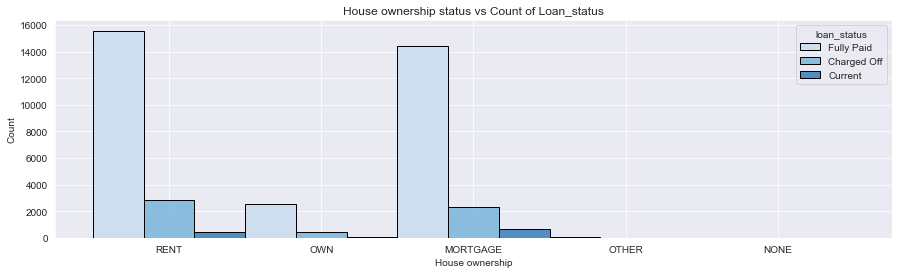

In [60]:
plt.figure(figsize=(15,4))
sns.histplot(x = df['home_ownership'],hue=df['loan_status'],palette='Blues',edgecolor='black',multiple='dodge')
plt.title('House ownership status vs Count of Loan_status')
plt.xlabel('House ownership')
plt.show()
#observation
# charged off loans are less when compared to fully paid loans

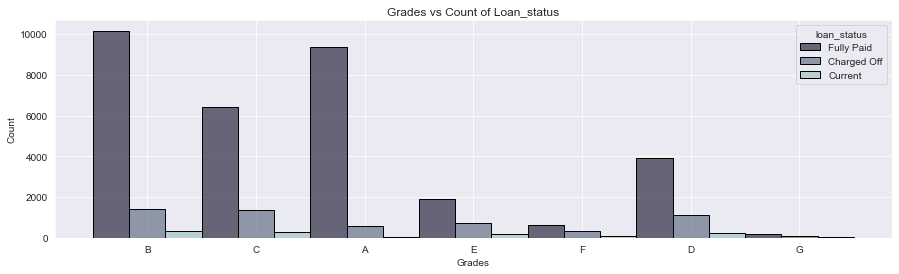

In [61]:
plt.figure(figsize=(15,4))
sns.histplot(x = df['grade'],hue=df['loan_status'],palette='bone',edgecolor='black',multiple='dodge')
plt.title('Grades vs Count of Loan_status')
plt.xlabel('Grades')
plt.show()
#observation
#the rate between each entity is low

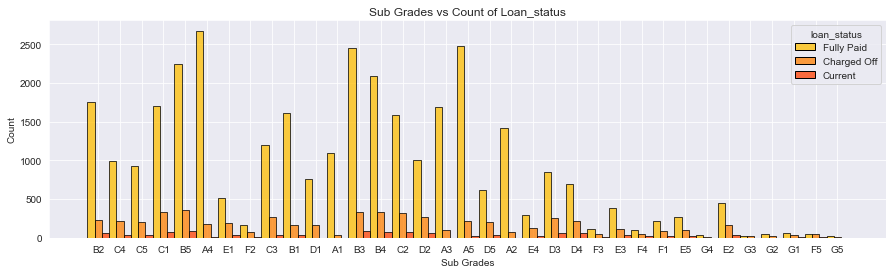

In [62]:
plt.figure(figsize=(15,4))
sns.histplot(x = df['sub_grade'],hue=df['loan_status'],palette='autumn_r',edgecolor='black',multiple='dodge')
plt.title('Sub Grades vs Count of Loan_status')
plt.xlabel('Sub Grades')
plt.show()
#observation
#the rate between each entity is low 

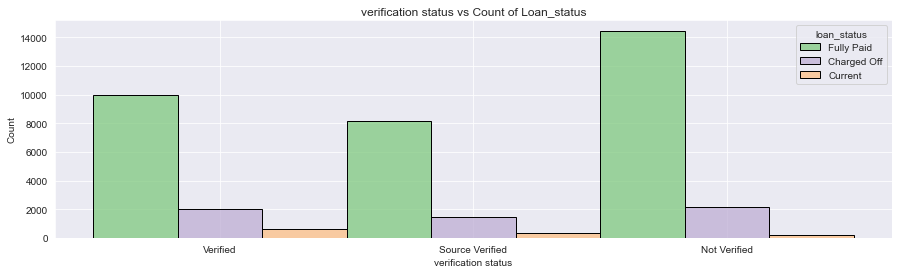

In [63]:
plt.figure(figsize=(15,4))
sns.histplot(x = df['verification_status'],hue=df['loan_status'],palette='Accent',edgecolor='black',multiple='dodge')
plt.title('verification status vs Count of Loan_status')
plt.xlabel('verification status')
plt.show()
#observation
#Not verified people took most of the loans that are full paid but other 2 segments have a high charged off rate when compared

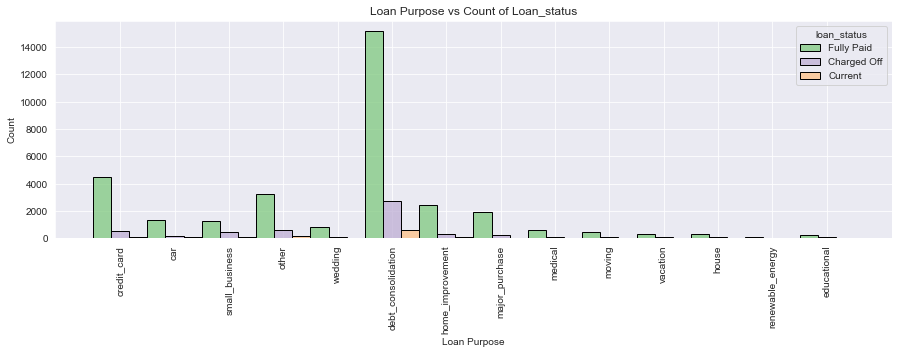

In [64]:
plt.figure(figsize=(15,4))
sns.histplot(x = df['loan_purpose'],hue=df['loan_status'],palette='Accent',edgecolor='black',multiple='dodge')
plt.title('Loan Purpose vs Count of Loan_status')
plt.xlabel('Loan Purpose')
plt.xticks(rotation = 90)
plt.show()
#observation
#Debt consolation took most of the loans and have greater than 50% of Fully paid and charged off sector.

#### Creating Interval Variables(Type Driven Metrics) Because they can be useful in Bi variate analysis

In [65]:
df['annual_income'].describe()
#down we will seggreagte acoording to this

count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_income, dtype: float64

In [66]:
def income(x):
    if 0<x<50000:
        return '1-50k'
    elif 50000<x<100000:
        return '50-100k'
    elif 100000<x<150000:
        return '100-150k'
    elif 150000<x<200000:
        return '150-200k'
    else:
        return '>200k'
            
df['annual_income_segg'] = df['annual_income'].apply(lambda x: income(x))

# we will create a new colum with declared range

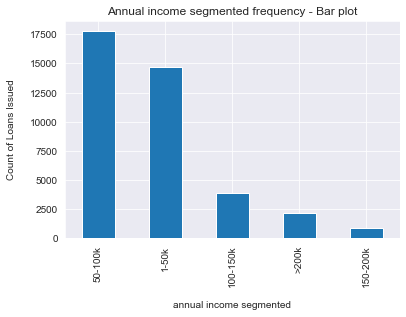

In [67]:
df['annual_income_segg'].value_counts().plot(kind='bar')
plt.title('Annual income segmented frequency - Bar plot')
plt.xlabel("annual income segmented", labelpad=14)
plt.ylabel("Count of Loans Issued", labelpad=14)
plt.show()
#observation
# a new colum is created and we plotted a graph using this

In [68]:
df['interest_rate'].describe()
#we will split according to this data

count    39319.000000
mean        12.006142
std          3.717367
min          5.420000
25%          9.250000
50%         11.830000
75%         14.540000
max         24.590000
Name: interest_rate, dtype: float64

In [69]:
df['interest_rate_segg'] = pd.cut(df['interest_rate'], [0, 6 , 12 , 18, 25], labels=['0-6', '6-12', '12-18', '18+'])
# I don't know this process before so I have done it manually above.

In [70]:
df['interest_rate_segg'].value_counts()
# here we got the seggregated values

6-12     19470
12-18    16054
18+       2452
0-6       1343
Name: interest_rate_segg, dtype: int64

In [71]:
df['loan_amnt'].describe()
# repeating the same steps above for loan amnt

count    39319.000000
mean     11134.114550
std       7376.086312
min        500.000000
25%       5400.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [72]:
df['loan_amnt_segg']=pd.cut(df['loan_amnt'],[0,9000,18000,27000,36000],labels = ['0-9k','9k-18k','18k-27k','27k+'])

In [73]:
df['loan_amnt_segg'].value_counts()

0-9k       18756
9k-18k     14033
18k-27k     5158
27k+        1372
Name: loan_amnt_segg, dtype: int64

In [74]:
df['debt_to_income_ratio'].describe()

count    39319.000000
mean        13.376622
std          6.663140
min          0.000000
25%          8.270000
50%         13.480000
75%         18.640000
max         29.990000
Name: debt_to_income_ratio, dtype: float64

In [75]:
df['debt_to_income_ratio_segg'] = pd.cut(df['debt_to_income_ratio'], [0, 6 , 12 , 18, 25,32], labels=['0-6', '6-12', '12-18', '18-25','25+'])

In [76]:
df['debt_to_income_ratio_segg'].value_counts()

12-18    11625
6-12     10395
18-25    10269
0-6       6174
25+        675
Name: debt_to_income_ratio_segg, dtype: int64

#### BI VARIATE ANALYSIS

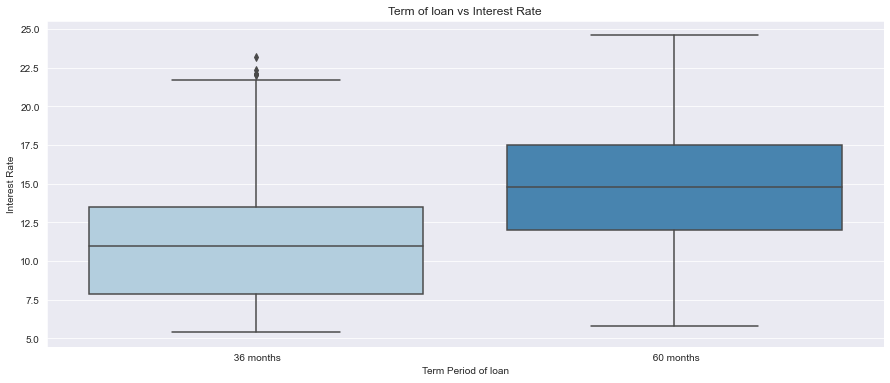

In [77]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df,y='interest_rate', x='term',palette='Blues')
plt.title('Term of loan vs Interest Rate')
plt.ylabel('Interest Rate')
plt.xlabel('Term Period of loan')
plt.show()
#observation
#average interrest rate of 60 months is greater than 36 months
#so there is a probability of more charged people here due to more interest rate
# the interest rate varies heavily between 4%

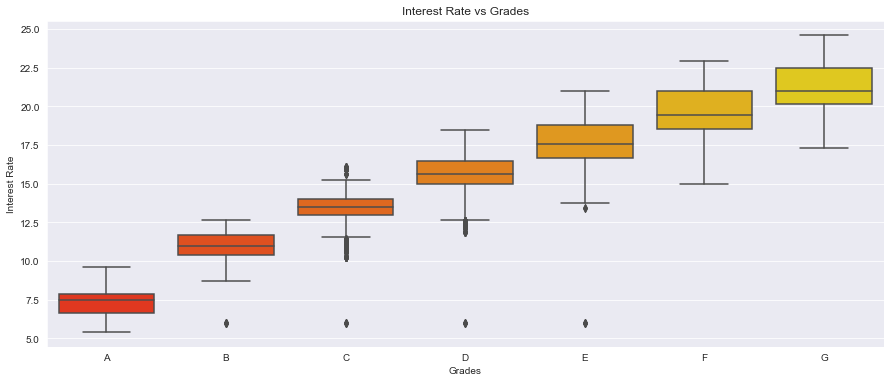

In [78]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df,x='grade',y='interest_rate',palette='autumn',order = 'ABCDEFG')
plt.title('Interest Rate vs Grades')
plt.ylabel('Interest Rate')
plt.xlabel('Grades')
plt.show()
#observation
# the average interest rate for each of the grade is increasing gradually
# the highest interest rate is paid by G grade loan applicants

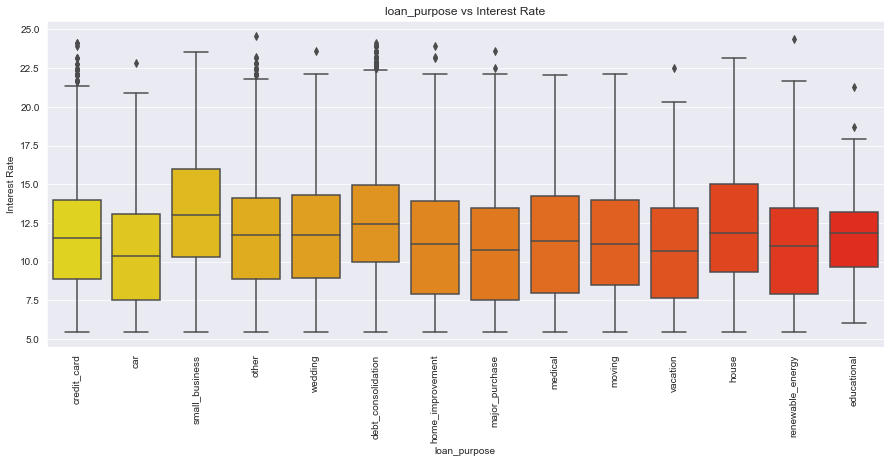

In [79]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df,x='loan_purpose',y='interest_rate',palette='autumn_r')
plt.title('loan_purpose vs Interest Rate')
plt.ylabel('Interest Rate')
plt.xlabel('loan_purpose')
plt.xticks(rotation = 90)
plt.show()
#observation
#samll_business has the highest interest rate and cars has the lowest

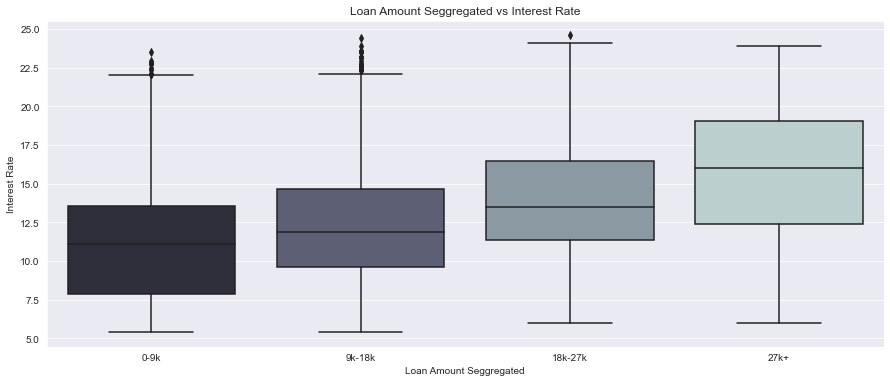

In [80]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df,x='loan_amnt_segg',y='interest_rate',palette='bone')
plt.title('Loan Amount Seggregated vs Interest Rate')
plt.ylabel('Interest Rate')
plt.xlabel('Loan Amount Seggregated')
plt.show()
#observation
#loan amount which has greater than 27k+ has higher interest rate when compared to others

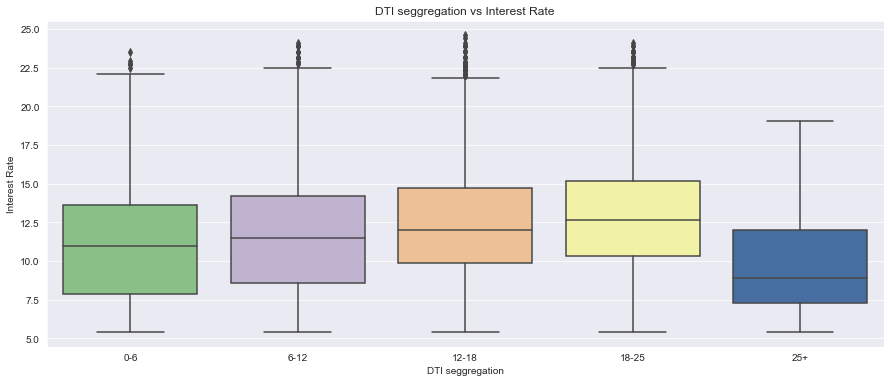

In [81]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df,x='debt_to_income_ratio_segg',y='interest_rate',palette='Accent')
plt.title('DTI seggregation vs Interest Rate')
plt.ylabel('Interest Rate')
plt.xlabel('DTI seggregation')
plt.show()
#observation
#people who have dti rate above 25 has lowest avg interest rate
#people who have dti rate in between 18-25 has highest avg interest rate

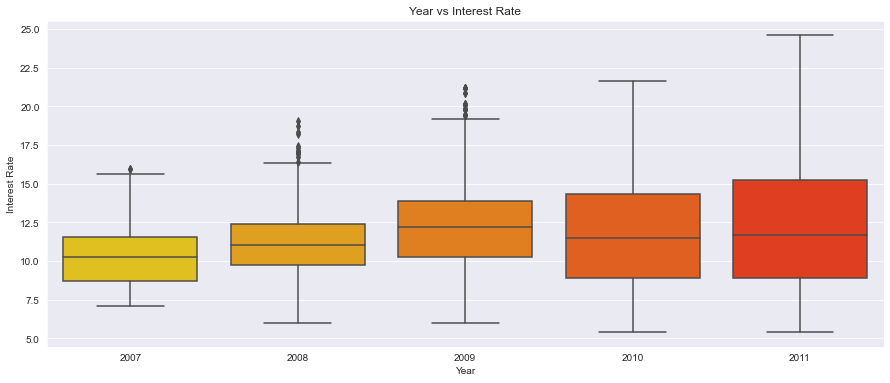

In [82]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df,x='loan_year',y='interest_rate',palette='autumn_r')
plt.title('Year vs Interest Rate')
plt.ylabel('Interest Rate')
plt.xlabel('Year')
plt.show()
#observation
#2007 has the lowest avg interest rate and it gradually increases up and until 2009 
#then there is graduall fall in the interest rate until 2011

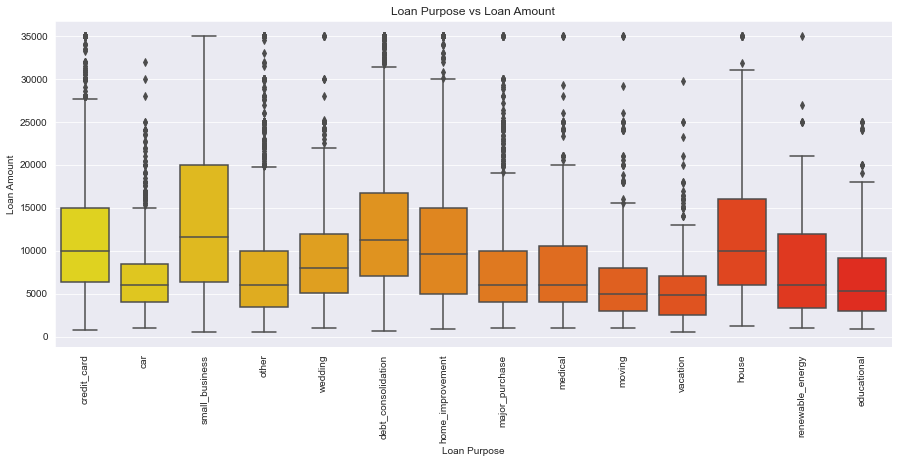

In [83]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df,x='loan_purpose',y='loan_amnt',palette='autumn_r')
plt.title('Loan Purpose vs Loan Amount')
plt.ylabel('Loan Amount')
plt.xlabel('Loan Purpose')
plt.xticks(rotation =90)
plt.show()
#observation
# small business is the most average loan amount
# there is a lot of difference between q3 and95th percentile in small business

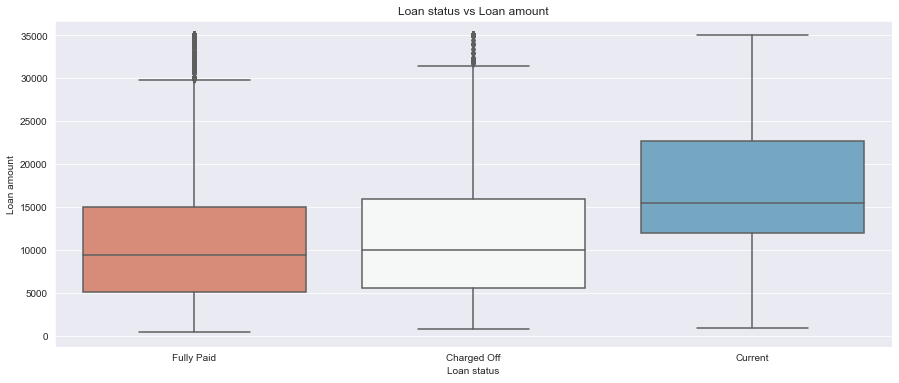

In [84]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df,x='loan_status',y='loan_amnt',palette='RdBu')
plt.title('Loan status vs Loan amount')
plt.ylabel('Loan amount')
plt.xlabel('Loan status')
plt.show()
#observation
#both fully paid and charged off have the same average loan amount
#but current has more avg loan amount

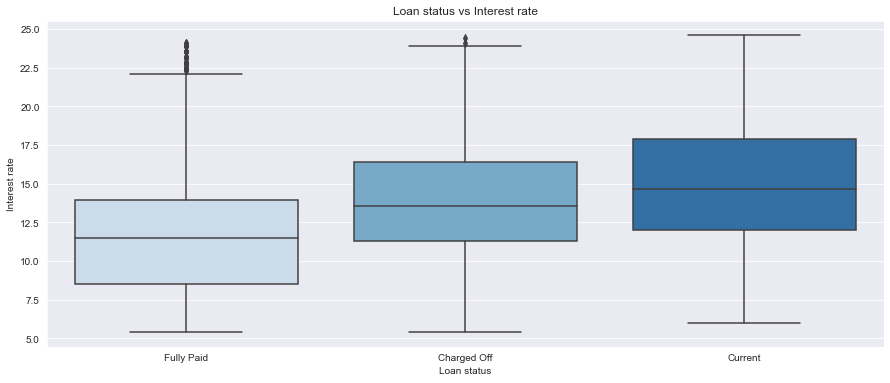

In [85]:
plt.figure(figsize=(15,6))
sns.boxplot(data = df,x='loan_status',y='interest_rate',palette='Blues')
plt.title('Loan status vs Interest rate')
plt.ylabel('Interest rate')
plt.xlabel('Loan status')
plt.show()
#observation
#Charged off and current has almost equal avg interest rate

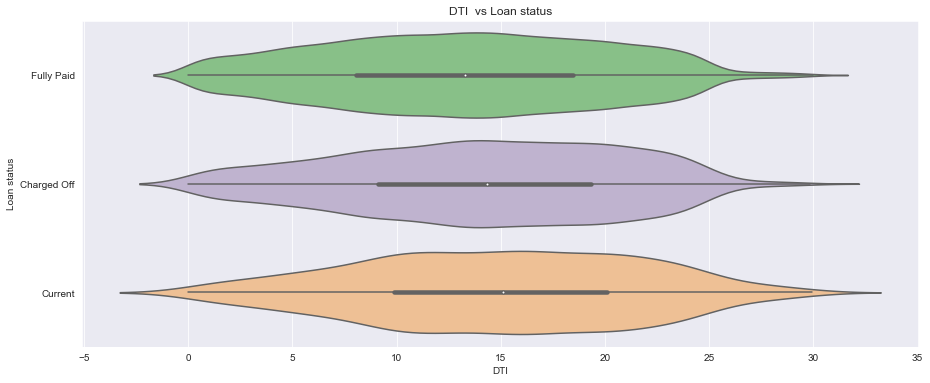

In [86]:
plt.figure(figsize=(15,6))
sns.violinplot(data = df,x='debt_to_income_ratio',y='loan_status',palette='Accent')
plt.title('DTI  vs Loan status')
plt.ylabel('Loan status')
plt.xlabel('DTI')
plt.show()
# observation
# charged off has a higher DTI when compared to Fullypaid

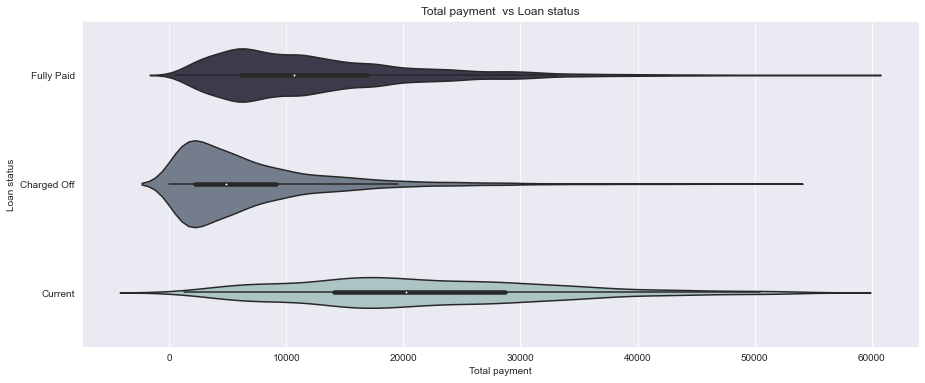

In [87]:
plt.figure(figsize=(15,6))
sns.violinplot(data = df,x='total_pymnt',y='loan_status',palette='bone')
plt.title('Total payment  vs Loan status')
plt.ylabel('Loan status')
plt.xlabel('Total payment')
plt.show()
#observation
# the average of total paid amount is far more less for Charged off people